In [1]:
import json

import pandas as pd

from TiktokAPI import TiktokAPI

In [2]:
api_key = "vpvBSpscfe6JZXV6MhPFvCGBkHP17Susk0ufxyZ8c14f1g0d"
api = TiktokAPI(api_key)

In [32]:
df = list()
keywords = ["Derail", "Derailment", "OhioTrainCrash", "Ohiotrainderailed", "Ohiouncuredpvc", "VinylChloride"]
for keyword in keywords:
    videos = list()
    with open(f"../data/tiktok/query_result/{keyword}.json", "r") as f:
        for content in json.loads(f.read()):
            try:
                videos.extend(content["item_list"])
            except Exception:
                continue
    df_keyword = api.prase_video_result(videos)
    df_keyword["Keyword"] = keyword
    df.append(df_keyword)
df = pd.concat(df)
df = df[(df["Day"] >= "20230203") & (df["Day"] <= "20230228")]

<AxesSubplot: xlabel='Day'>

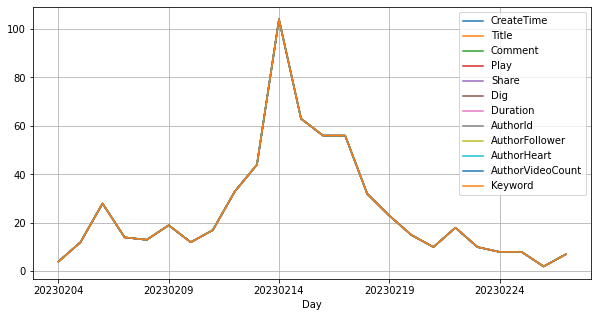

In [33]:
df.groupby(["Day"]).count().plot(figsize=(10, 5), grid=True)

<AxesSubplot: xlabel='Day'>

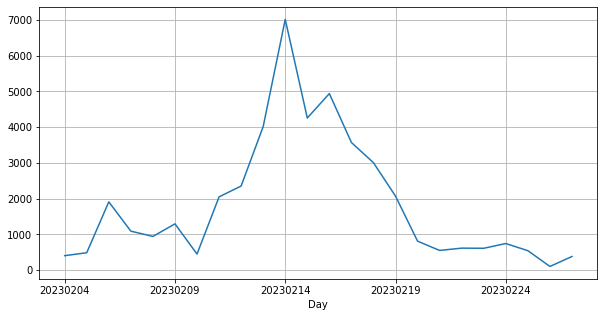

In [34]:
df.groupby(["Day"])["Duration"].sum().plot(figsize=(10, 5), grid=True)

In [ ]:
df.to_csv("../data/tiktok/VideoSummary.csv", sep="\t", index_label="Id")